In [1]:
import numpy as np
# from keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import datasets, layers, models

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# (x_train_load, y_train_load), (x_test_load, y_test_load) = datasets.cifar10.load_data()
(x_train_load, y_train_load), (x_test_load, y_test_load) = cifar10.load_data()

# 處理數據
x_train_load = x_train_load[:500]
y_train_load = y_train_load[:500]

x_test_load = x_test_load[:20]
y_test_load = y_test_load[:20]

print(x_test_load.shape)

(20, 32, 32, 3)


In [27]:
# Data normalization

x_train = x_train_load.reshape((x_train_load.shape[0], 32, 32, 3)).astype('float32') / 255     # ==> 39s
x_test = x_test_load.reshape((x_test_load.shape[0], 32, 32, 3)).astype('float32') / 255
# x_train = x_train_load / 255                       # ==> 37s  43
# x_test = x_test_load/ 255

# 將標籤轉換為 one-hot 編碼
y_train = to_categorical(y_train_load)
y_test = to_categorical(y_test_load)

print(x_train.shape)

(500, 32, 32, 3)


In [7]:
# 建立模型
import time
start_time = time.time()

model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))
# history = model.fit(train_generator, epochs=50, batch_size=64, validation_data=(x_test, y_test))
end_time = time.time()
print(f"Training took {end_time - start_time} seconds")


Epoch 1/50
8/8 [==============================] - 1s 92ms/step - loss: 2.3056 - accuracy: 0.1120 - val_loss: 2.2885 - val_accuracy: 0.0500
Epoch 2/50
8/8 [==============================] - 0s 42ms/step - loss: 2.2936 - accuracy: 0.1300 - val_loss: 2.2847 - val_accuracy: 0.1000
Epoch 3/50
8/8 [==============================] - 0s 53ms/step - loss: 2.2876 - accuracy: 0.1300 - val_loss: 2.2901 - val_accuracy: 0.1000
Epoch 4/50
8/8 [==============================] - 1s 61ms/step - loss: 2.2805 - accuracy: 0.1300 - val_loss: 2.2941 - val_accuracy: 0.1000
Epoch 5/50
8/8 [==============================] - 1s 67ms/step - loss: 2.2734 - accuracy: 0.1300 - val_loss: 2.2979 - val_accuracy: 0.1000
Epoch 6/50
8/8 [==============================] - 1s 62ms/step - loss: 2.2609 - accuracy: 0.1300 - val_loss: 2.2937 - val_accuracy: 0.1000
Epoch 7/50
8/8 [==============================] - 0s 46ms/step - loss: 2.2446 - accuracy: 0.1320 - val_loss: 2.2779 - val_accuracy: 0.1000
Epoch 8/50
8/8 [===========

In [30]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
train_datagen = ImageDataGenerator(rotation_range=0,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1)
train_generator = train_datagen.flow(x_train,y_train,batch_size=32,shuffle=True) 
import time
start_time = time.time()
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
# history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))
history = model.fit(train_generator, epochs=50, batch_size=64, validation_data=(x_test, y_test))
end_time = time.time()
print(f"Training took {end_time - start_time} seconds")

Epoch 1/50
16/16 [==============================] - 2s 78ms/step - loss: 2.3004 - accuracy: 0.0960 - val_loss: 2.3097 - val_accuracy: 0.1500
Epoch 2/50
16/16 [==============================] - 1s 56ms/step - loss: 2.2858 - accuracy: 0.1180 - val_loss: 2.2897 - val_accuracy: 0.1000
Epoch 3/50
16/16 [==============================] - 1s 57ms/step - loss: 2.2738 - accuracy: 0.1280 - val_loss: 2.2552 - val_accuracy: 0.2500
Epoch 4/50
16/16 [==============================] - 1s 42ms/step - loss: 2.2461 - accuracy: 0.1740 - val_loss: 2.1178 - val_accuracy: 0.3500
Epoch 5/50
16/16 [==============================] - 1s 59ms/step - loss: 2.2121 - accuracy: 0.1700 - val_loss: 2.0633 - val_accuracy: 0.2500
Epoch 6/50
16/16 [==============================] - 1s 50ms/step - loss: 2.1763 - accuracy: 0.1680 - val_loss: 2.0017 - val_accuracy: 0.2000
Epoch 7/50
16/16 [==============================] - 1s 58ms/step - loss: 2.1539 - accuracy: 0.1640 - val_loss: 1.9219 - val_accuracy: 0.3000
Epoch 8/50
16

In [24]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_train)
y_pred_label = np.argmax(y_pred, axis=1)
y_train_label = np.argmax(y_train, axis=1)
cm = confusion_matrix(y_train_label, y_pred_label)

# 打印混淆矩陣
print("Confusion Matrix:")
print(cm)

16/16 [==============================] - 0s 2ms/step
Confusion Matrix:
[[ 8 11  1  1  0  1  0  6 17  6]
 [ 0 52  0  0  1  1  1  0  4  6]
 [ 2  4 12  2  7  2  5  4  1  4]
 [ 1  5  0 12  1  3  8  7  0 10]
 [ 1  3  4  0 13  1 16 10  1  1]
 [ 0  3  4  2  2 14  6  7  0  2]
 [ 0  0  0  1  2  0 44  2  0  4]
 [ 0  4  0  0  3  1  1 33  2  6]
 [ 1 10  0  0  0  0  0  2 25  7]
 [ 0  6  0  0  0  0  1  3  1 45]]


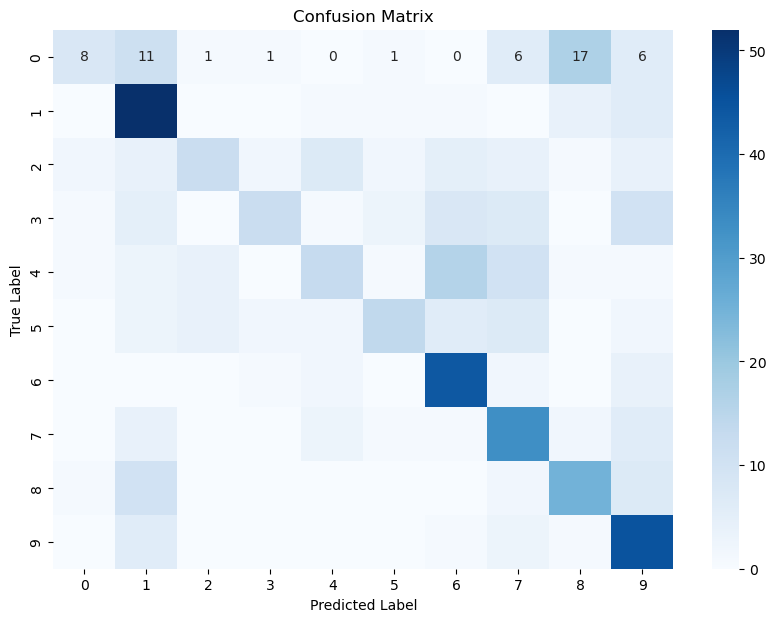

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製混淆矩陣的熱圖
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Exercise : try to encapsulate the confusion matrix functionality and utilize it to present the results of both training set and testing set

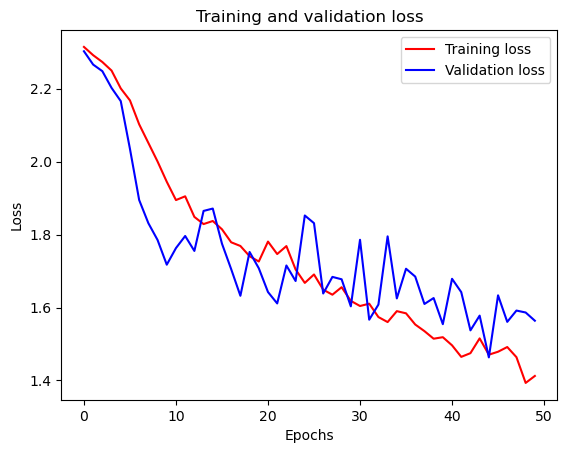

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [11]:
# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 20ms/step - loss: 1.8148 - accuracy: 0.3500
Test accuracy: 0.3499999940395355


In [12]:
y_pred = model.predict(x_test)
print(y_pred.shape)

# print(|y_pred)
y_pred_label = np.argmax(y_pred, axis=1)    
print('y_pred: ', y_pred_label)


1/1 [==============================] - 0s 21ms/step
(20, 10)
y_pred:  [6 8 1 8 4 3 5 6 4 9 0 9 7 1 1 8 5 4 8 7]


In [13]:
# 找出預測錯誤的索引
y_pred = model.predict(x_test)
print('y_shape: ', y_pred.shape)

y_pred_label = np.argmax(y_pred, axis=1)  # axis=1：沿著行查找每行的最大值的索引。axis=0：沿著列查找每列的最大值的索引。
y_test_label = np.argmax(y_test, axis=1)

print('y_pred: ', y_pred_label)
print('y_test: ', y_test_label)

len(x_test)
errors = np.where(y_pred_label != y_test_label)[0]
print(f'Index of Prediction errors:  {errors} ')
print(f'Total number of prediction errors: {len(errors)}')

1/1 [==============================] - 0s 19ms/step
y_shape:  (20, 10)
y_pred:  [6 8 1 8 4 3 5 6 4 9 0 9 7 1 1 8 5 4 8 7]
y_test:  [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]
Index of Prediction errors:  [ 0  2  3  4  5  6  8  9 12 13 14 17 19] 
Total number of prediction errors: 13


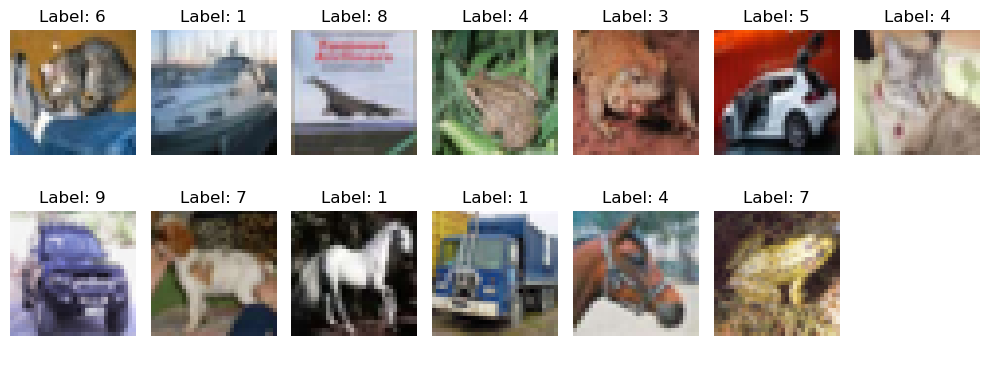

In [14]:
# 假設 num_images 是你的圖像數量
num_images = len(errors)  # 或其他你定義的圖像數量

# 決定每排最多顯示的圖像數
images_per_row = num_images // 2 + num_images % 2

# 創建子圖，自動計算需要的行數
rows = (num_images + images_per_row - 1) // images_per_row
fig, axes = plt.subplots(rows, images_per_row, figsize=(10, 4))
axes = axes.flatten()  # 使 axes 可迭代，保證即使是一行也能正常工作

# 顯示圖像
for i, ax in enumerate(axes):
    if i < num_images:
        ax.imshow(x_test_load[errors[i]])
        ax.set_title(f'Label: {y_pred_label[errors[i]]}')
        ax.axis('off')  # 不顯示軸
    else:
        ax.axis('off')  # 對於不需要的軸也關閉顯示

plt.tight_layout()
plt.show()